In [29]:
#Imports
import pandas as pd
from scipy.stats import mannwhitneyu

from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.style.use('fivethirtyeight')
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [30]:
#Load data - school grades by school for 2017-2018 school year

school_grades = pd.read_csv(r"..\Data\Florida data\FLDOE\School Grades\SchoolGrades18 (1).csv", header=4)
school_grades.head()

,District Number,District Name,School Number,School Name,English Language Arts Achievement,English Language Arts Learning Gains,English Language Arts Learning Gains of the Lowest 25%,Mathematics Achievement,Mathematics Learning Gains,Mathematics Learning Gains of the Lowest 25%,...,Grade 1999,Was the collocated rule used?,Collocated Number,Charter School,Title I,Alternative/ESE Center School,School Type,Percent of Minority Students,Percent of Economically Disadvantaged Students,Region
0,1,ALACHUA,31,J. J. FINLEY ELEMENTARY SCHOOL,56.0,57.0,32.0,55.0,52.0,33.0,...,B,N,NaN,NO,YES,N,1,65.6,81.3,0.0
1,1,ALACHUA,41,STEPHEN FOSTER ELEMENTARY SCHOOL,64.0,55.0,28.0,67.0,59.0,33.0,...,C,N,NaN,NO,YES,N,1,69.0,100.0,0.0
2,1,ALACHUA,71,LAKE FOREST ELEMENTARY SCHOOL,30.0,43.0,55.0,35.0,40.0,41.0,...,D,N,NaN,NO,YES,N,1,90.6,100.0,0.0
3,1,ALACHUA,91,LITTLEWOOD ELEMENTARY SCHOOL,58.0,51.0,47.0,64.0,62.0,42.0,...,B,N,NaN,NO,YES,N,1,58.0,94.0,0.0
4,1,ALACHUA,101,W. A. METCALFE ELEMENTARY SCHOOL,24.0,39.0,40.0,32.0,48.0,42.0,...,D,N,NaN,NO,YES,N,1,94.6,100.0,0.0


In [31]:
school_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 48 columns):
District Number                                           3331 non-null int64
District Name                                             3331 non-null object
School Number                                             3331 non-null int64
School Name                                               3331 non-null object
English Language Arts Achievement                         3295 non-null float64
English Language Arts Learning Gains                      3280 non-null float64
English Language Arts Learning Gains of the Lowest 25%    3210 non-null float64
Mathematics Achievement                                   3293 non-null float64
Mathematics Learning Gains                                3278 non-null float64
Mathematics Learning Gains of the Lowest 25%              3205 non-null float64
Science Achievement                                       3229 non-null float64
Social Studies Achi

In [32]:
school_grades.isna().sum()

District Number                                              0
District Name                                                0
School Number                                                0
School Name                                                  0
English Language Arts Achievement                           36
English Language Arts Learning Gains                        51
English Language Arts Learning Gains of the Lowest 25%     121
Mathematics Achievement                                     38
Mathematics Learning Gains                                  53
Mathematics Learning Gains of the Lowest 25%               126
Science Achievement                                        102
Social Studies Achievement                                1888
Middle School Acceleration                                2391
Graduation Rate 2016-17                                   2767
College and Career Acceleration 2016-17                   2772
Total Points Earned                                    

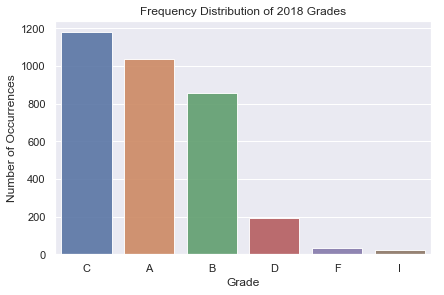

In [33]:
#Visualize grade frequencies for 2018 grades

grade_count = school_grades['Grade 2018'].value_counts()
sns.set(style="darkgrid")
sns.barplot(grade_count.index, grade_count.values, alpha=0.9)
plt.title('Frequency Distribution of 2018 Grades')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Grade', fontsize=12)
plt.show()

In [34]:
#Map grades to numbers for Grade 2018 column
school_grades = school_grades.replace({'Grade 2018': {'A': 1, 'B': 2, 'C':3, 'D':4, 'F':5, 'I':6}})


In [35]:
#Define non-charter sample and charter sample
non_charter = school_grades[school_grades['Charter School']=='NO']['Grade 2018']
charter = school_grades[school_grades['Charter School']=='YES']['Grade 2018']

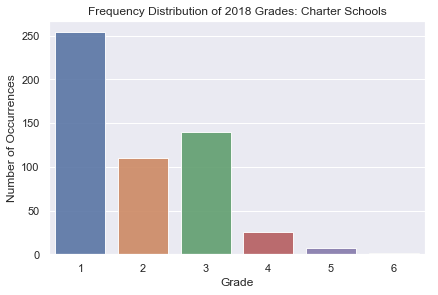

In [36]:
grade_count = charter.value_counts()
sns.set(style="darkgrid")
sns.barplot(grade_count.index, grade_count.values, alpha=0.9)
plt.title('Frequency Distribution of 2018 Grades: Charter Schools')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Grade', fontsize=12)
plt.show()

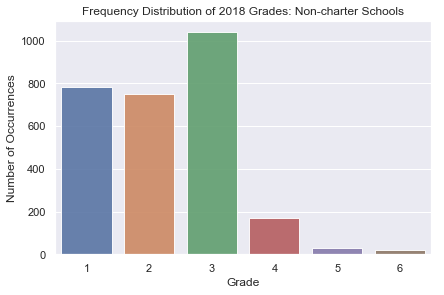

In [37]:
grade_count = non_charter.value_counts()
sns.set(style="darkgrid")
sns.barplot(grade_count.index, grade_count.values, alpha=0.9)
plt.title('Frequency Distribution of 2018 Grades: Non-charter Schools')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Grade', fontsize=12)
plt.show()

# Non-parametric test for comparison of two groups
***
Since the school grades data is ordinal, we need to use a non-parametric hypothesis test to compare the two independent samples (non-charter and charter).
The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

Research question: Is there a significant difference in the grade performance of charter schools and non-charter public schools?

In [38]:
# Mann-Whitney U test

# compare samples
stat, p = mannwhitneyu(non_charter, charter)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=608783.000, p=0.000
Different distribution (reject H0)


Result: Reject the null hypothesis. There is a significant difference in the grade performance of charter schools compared to non-charter public schools.